# D213 Performance Assessment
## Darian Gurrola
## Course Instructor: Dr. Festus Elleh

## A1.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The question being investigated in this analysis is "Can we analyze digital text to gauge reviewer sentiment?".  This question will be answered using a neural network model and natural language processing techniques.

## A2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The objective of this analysis is to create a deep learning model that can determine if reviewer sentiment is positive or negative based on textual data from customer reviews.

## A3.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A recurrent neural network (RNN) is a type of artificial neural network that can be trained to generate predictions from text data.  It can process sequential inputs such as text or video, and identify and recall patterns in the sequences (Craig, 2023).  Much like a human brain, an RNN has several layers of neurons that work together to perform complex processes.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first of these layers, known as the input layer, receives the information and passes it along to the hidden layers.  This is where all of the data processing and analysis occurs.  The hidden layers use feedback loops, or recurrent cells, to remember previous inputs for future predictions (AWS).  When an RNN receives a new input, these recurrent cells combine the new data with the information received from previous inputs to identify new patterns (Craig, 2023).  The last layer, or output layer, provides the result generated by the processing that takes place in the hidden layer.   

## B1.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the business question has been defined, we can commence with the data exploration phase of the analysis.  The first step I took was to import several python libraries which include pandas, numpy, csv, seaborn, matplotlib, sys, scikit-learn, re, tensorflow, keras, and nltk.  I used pandas to import three csv files containing reviews from Yelp, IMDB, and Amazon into three different dataframes.  After printing the head of each dataframe, I saw that they each have a text column containing user reviews, and a numerical column denoting reviewer sentiment.  I combined the three dataframes using the "concat()" method and assigned them to a new dataframe called "df_review".  I also set the column names to "Text" and "Sentiment" accordingly.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Upon inspection of "df_review", we can see that there are 3,000 total reviews.  The output of the "isnull()" and isna()" methods indicate that there are no null or missing values in the dataset.  Using the "countplot()" method from seaborn, we can also see that reviewer sentiment is split evenly between 0 and 1.  In this context, 0 represents a negative review, while 1 represents a positive review.   

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Presence of unusual characters:** Because this analysis involves text data, there are a few measures we must take to make it compatible with a neural network model.  One of these measures is to check for unusual characters such as emojis or non-english characters.  To do this, I used a loop to iterate through each review and obtain a list of unique characters.  The output indicates that there are characters such as punctuation marks and mathematical symbols which could pose a problem later on in the analysis. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To preprocess the text appropriately, I used another for loop.  This loop iterates through each review in the "Text" column of "df_review" and modifies it in several ways.  First, the "sub()" method from the "re" module is used to replace all special characters and punctuation marks with blank spaces.  The "lower()" method is then used to convert all reviews to lowercase and ensure uniformity.  Next, the review is tokenized into individual words using the "word_tokenize()" method from the nltk library.  The "WordNetLemmatizer()" method from the same library is used to reduce all word variants to their base form.  Lastly, stopwords are removed from the review to focus on more meaningful text.  The preprocessed reviews are then appended to a list of reviews called "review_list".  After reviewing the characters in "review_list", we can see that the number of characters is significantly smaller than before.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Vocabulary Size:** After preprocessing the text, the next step was to determine the vocabulary size of the reviews. To do this I initialzed the keras "Tokenizer()" method and used the "fit_on_texts()" method to create a word index of "review_list".  This index assigns each word in the "review_list" a unique integer.  From the output below, we can see that the word index has a vocabulary size of 4,553. This will play an important role when building the model later on. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Word Embedding Length:** To determine the word embedding length for the model, an empirical rule of thumb is to calculate the fourth root of the vocabulary size (Google for Developers).  Based on the vocabulary size determined previously, the word embedding length is 8.  Like the vocabulary size, embedding length will also play a role as the model is developed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Maximum Sequence Length:** The final component we will investigate during the data exploration phase is maximum sequence length.  To obtain the length, I used a loop to iterate through each review and find its length.  The lengths were assigned to "review_length".  I then used the "np.max()" method to find the maximum value in the list, which was 44.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After determining the values of each component discussed, I split the data into training and testing subsets.  The training subset is contained in the variables "X_train" and "y_train", while the testing subset is contained in "X_test" and "y_test".

In [1]:
# Install and import libraries
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf 
import keras # Neural Network API
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer #Convert input text to tokens
from tensorflow.keras.callbacks import EarlyStopping #Stop training at a threshold
from tensorflow.keras.models import load_model #To load a saved model
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import files
yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, quoting=csv.QUOTE_NONE)
imdb = pd.read_csv("imdb_labelled.txt", sep="\t", header=None, quoting=csv.QUOTE_NONE)
amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, quoting=csv.QUOTE_NONE)

In [3]:
yelp.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
imdb.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
amazon.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
#Concatenate files and set column names
df_review = pd.concat([yelp, imdb, amazon], ignore_index = True)
df_review.columns = ['Text', 'Sentiment']

In [7]:
df_review.shape

(3000, 2)

In [8]:
df_review.head()

,Text,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


<Axes: xlabel='Sentiment', ylabel='count'>

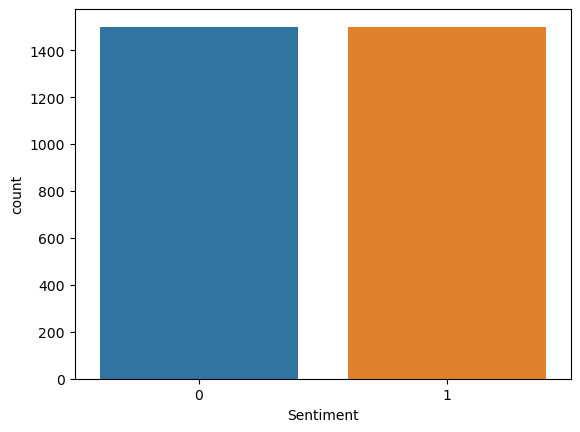

In [9]:
#Compare positive and negative sentiments in dataset
sns.countplot(x='Sentiment', data=df_review)

In [10]:
#Detect missing values
df_review.isnull().values.any()

False

In [11]:
df_review.isna().sum()

Text         0
Sentiment    0
dtype: int64

### Presence of unusual characters

In [12]:
#Detect unusual characters 
char_list = []
reviews = df_review['Text']
for review in reviews:
    for char in review:
        if char not in char_list:
            char_list.append(char)
print(char_list)

['W', 'o', 'w', '.', ' ', 'L', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'l', 'a', 'c', 'C', 'r', 'u', 'n', 'g', 'N', 'y', 'x', 'j', 'S', 'b', 'M', 'k', 'f', 'R', 'm', 'T', 'I', 'H', "'", 'A', ')', ',', '!', 'V', 'B', 'z', '-', '4', 'O', '2', '3', 'q', 'P', 'F', 'G', '5', '1', '0', 'E', 'Z', 'D', 'U', 'J', 'Y', 'K', '&', 'é', ':', ';', '9', '7', '(', 'X', '"', '/', '8', 'Q', '$', '%', '+', '*', '?', '6', 'ê', '\x96', '\x85', 'å', '\x97', '#', '[', ']']


In [13]:
#Remove Unusual characters, perform tokenization and lemmatization [In-text citation: D213 Task 2 Data Preprocessing in Python]
review_list = []
stop_words = stopwords.words('english')
for review in df_review['Text']:

    #Regular expression, removes punctuation and special characters
    review = re.sub("[^a-zA-Z]", " ", review)

    #Convert to lower case
    review = review.lower()

    #Perform tokenization
    review = nltk.word_tokenize(review)

    #Perform lemmatization
    lemma = nltk.WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review]

    #Removing stopwords
    review = [word for word in review if not word in stop_words]
    review = " ".join(review)
    review_list.append(review)

In [14]:
#Detect unusual characters 
char_list = []
reviews = review_list
for review in reviews:
    for char in review:
        if char not in char_list:
            char_list.append(char)
print(char_list)

['w', 'o', ' ', 'l', 'v', 'e', 'd', 'p', 'a', 'c', 'r', 'u', 's', 't', 'g', 'y', 'x', 'n', 'm', 'b', 'k', 'h', 'i', 'f', 'z', 'q', 'j']


### Vocab Size

In [15]:
#Tokenize text and determine number of unique words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_list)
vocab_size = len(tokenizer.word_index)+1
print("Vocabulary Size: " + str(vocab_size))

Vocabulary Size: 4553


### Proposed Word Embedding Length

In [16]:
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
max_sequence_embedding

8

### Statistical Justification for Maximum Sequence Length

In [17]:
#Obtain longest and shortest review lengths
review_length = []
for char_len in review_list:
    review_length.append(len(char_len.split(" ")))

review_max = np.max(review_length)
review_min = np.min(review_length)
print(review_max)
print(review_min)

44
1


In [18]:
#Train test split
X = np.array(review_list)
y = df_review["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 15, stratify = y)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

#View training and test sample sizes
print("Training size: ", X_train.shape)
print("Testing size: ", X_test.shape)

Training size:  (2400,)
Testing size:  (600,)


## B2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Tokenization is the process of breaking down sequences into smaller components, called tokens (Awan, 2023).  This is necessary for machine learning models to effectively analyze human language.  In the previous section, I created a word index that assigns each unique word an integer.  The next step in the tokenization process is to replace the words in each review with the integers in the word index.  To do this, I used the "texts_to_sequences()" function below on my training and testing subsets.

Belows is an example of a review that has been converted into a sequence.

In [19]:
tokenizer

In [20]:
#Transform training text data to a sequence of integers 
sequences_train = tokenizer.texts_to_sequences(X_train)

#Transform testing text data to a sequence of integers 
sequences_test = tokenizer.texts_to_sequences(X_test)

In [21]:
print("Original Review: ", X_train[1])
print("Sequence: ", sequences_train[1])

Original Review:  doe everything description said would
Sequence:  [61, 60, 793, 191, 18]


## B3.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step is to  perform padding on the sequences.  Based on our findings in the data exploration phase, we can see that our reviews vary in significantly in length. This poses a problem because machine learning algorithms require fixed-length inputs for natual language processing (EITCA, 2023).  Padding resolves this issue by ensuring that each sequence is the exact same length.  In the code below, I used the "pad_sequences()" function from the tensorflow library to on both the testing and training integer sequences.  The outputs were assigned to "padded_train" and "padded_test".  To standardize the length of each sequence, I set the "maxlen" parameter to the length of the sequence.  I also set the "padding" parameter to "post" to ensure that padding occurs after each text sequence.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Below is also an example of a padded sequence from the training dataset.  We can see that the sequence has been converted to an array with a length of 44.  To reach the specified length, the array is padded with zeroes at the end.

In [22]:
#Apply padding to training data
padded_train = pad_sequences(sequences_train, maxlen = review_max, padding = "post", truncating = "post")

#Apply padding to testing data
padded_test = pad_sequences(sequences_test, maxlen = review_max, padding = "post", truncating = "post")

### Example of a padded sequence

In [23]:
np.set_printoptions(threshold=sys.maxsize)
padded_train[1]

array([ 61,  60, 793, 191,  18,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0], dtype=int32)

## B4. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There are two categories the model will use to classify the sentiment of each review.  A category of 0 represents negative sentiment while a category of 1 represents positive sentiment.  The final layer of the model will contain a sigmoid activation function.  This function has a binary output which matches the binary sentiment categories.

## B5.

Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split (based on the industry average).

These are each of the steps used to prepare the data for analysis. The code for the final step can be seen below.

1. Import necessary libraries
2. Import text files and concatenate
3. Explore Data (identify unusual characters, missing and null values)
4. Clean Data (remove unusual characters, lowercase, tokenize, lemmatize, remove stopwords)
5. Obtain parameters for neural network (Vocabulary Size, Embedding Size, Max Sequence Length) 
6. Split data into 80% training and 20% testing subsets in accordance with the industry average
7. Complete tokenization of training and testing subsets
8. Perform post-padding on sequences to standardize review length
9. Convert padded data and sentiment values into arrays 

In [24]:
#Convert padded data to numpy array to be used in model
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

## B6.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The padded data and labels have been included with this document.  These files are named "training_padded.csv", "test_padded.csv", "training_label.csv", and "test_label.csv".

In [25]:
#Export the data to csv files
pd.DataFrame(training_padded).to_csv("training_padded.csv")
pd.DataFrame(training_label).to_csv("training_label.csv")
pd.DataFrame(test_padded).to_csv("test_padded.csv")
pd.DataFrame(test_label).to_csv("test_label.csv")

## C1.

Please see the output of the model summary below.

In [26]:
#Build model and set activation function for layers
model = tf.keras.Sequential([
tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=max_sequence_embedding, input_length=review_max),
tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.Dense(100, activation='relu'), 
tf.keras.layers.Dense(50, activation='relu'), 
tf.keras.layers.Dense(1, activation = 'sigmoid') 
])


#Establish parameters for model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

#Fit model
history = model.fit(training_padded, training_label, batch_size = 32, epochs = 12,
                    validation_split = 0.3, callbacks = EarlyStopping(patience = 2), verbose = True)

#Generate model summary
model.summary()

Epoch 1/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5085 - loss: 0.6934 - val_accuracy: 0.4972 - val_loss: 0.6931
Epoch 2/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.4946 - loss: 0.6929 - val_accuracy: 0.4931 - val_loss: 0.6934
Epoch 3/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.5192 - loss: 0.6917 - val_accuracy: 0.4972 - val_loss: 0.6915
Epoch 4/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.5653 - loss: 0.6821 - val_accuracy: 0.5306 - val_loss: 0.6699
Epoch 5/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.7136 - loss: 0.6300 - val_accuracy: 0.7375 - val_loss: 0.5795
Epoch 6/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8201 - loss: 0.4703 - val_accuracy: 0.6431 - val_loss: 0.6094
Epoch 7/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8631 - loss: 0.3370 - val_accuracy: 0.7806 - val_loss: 0.4820
Epoch 8/12
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9117 - loss: 0.2402 - val_accuracy: 0.80

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 44, 8)          │        36,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 8)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,277 (497.18 KB)

 Trainable params: 42,425 (165.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,852 (331.46 KB)

## C2.

Discuss the number of layers, the type of layers, and the total number of parameters.

There are a total of 5 layers used in the neural network.  The first is an embedding layer which maps the input data from a high-dimensional to a low-dimensional space (Zvornicanin, 2024).  The second is a pooling layer that reduces the dimensions of data before passing it to subsequent layers.  The third and forth are dense layers which map the classification of a sequence based on the probability of each category.  "Dense_2" is the output layer which performs the classification based on the probability of each category.  The final layer provides the output of the calculations.  The output of the model summary indicates that there are 127,277 total parameters.

## C3.

Justify the choice of hyperparameters, including the following elements:

<ul>
    <li>activation functions</li>
    <li>number of nodes per layer</li>
    <li>loss function</li>
    <li>optimizer</li>
    <li>stopping criteria</li>
    <li>evaluation metric</li>
</ul>

To enhance performance, I performed hyperparameter tuning by running my model several times with different parameters.  Please see explanations for the optimal model parameters below.

### Activation Function

I used two different activation functions within my model.  I used a ReLU function for my hidden layers because it is less susceptible to the vanishing gradient problem that can affect neural networks (Brownlee, 2021).  The ReLU function is commonly used in hidden layers for this reason.  

I used a sigmoid function in the output layer because because it returns an output of 0 or 1.  This is useful when dealing with classifying binary outcomes such as positive and negative sentiment.

### Number of nodes per layer
Initially, I used a single layer with 50 nodes.  I found that accuracy improved when I increased this to 100 nodes, however, additional nodes did not have the same effect.  I then added a second hidden layer with 50 nodes.  After this point, additional layers and nodes no longer improved model accuracy.

### Loss Function
I used binary crossentropy as the loss function of the model.  This function is used to measure the difference between a predicted binary outcome and an actual binary label (Saxena, 2024).  

### Optimizer
I selected an adam optimization algorithm for my model because it is designed to improve training speeds in deep neural networks and reach convergence quickly (Agarwal, 2023). 

### Stopping Criteria
For the early stopping criteria I selected a patience of 2.  I tested several different values and found that this value maximized both training and testing accuracy.  Increasing the patience further appeared to reduce model performance.

### Evaluation Metric
I used accuracy as the evaluation metric for the neural network.  This metric calculates how often predictions match the correct labels (Keras).  This is essential for understanding how well the model is performing on training and testing datasets.

## D1.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;When developing a neural network it is essential to include stopping criteria to prevent overfitting (Brownlee, 2019).  Overfitting occurs when the model adapts to training data but performs significantly worse with testing data.  One form of stopping criteria is to limit the number of epochs for the model.  To do this, I ran the model several times with between 10 and 20 epochs.  I determined that model accuracy stopped increasing after 12 epochs, and set that as the maximum number.  Apart from this, I also set a patience of 2 epochs in my stopping criteria.  I found that increasing the patience led to reduced accuracy. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Please see the results of the final epoch below.

In [27]:
#Print results of final epoch
print("Final Training Epoch Results: ")
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Training Loss: ", history.history['loss'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])

Final Training Epoch Results: 
Training Accuracy:  0.9154762029647827
Training Loss:  0.2110745757818222
Validation Accuracy:  0.793055534362793
Validation Loss:  0.47513148188591003


## D2.

Assess the fitness of the model and any actions taken to address overfitting.

The model demonstrates a moderately good level of fitness.  The model obtained an accuracy score of .899 while the testing data obtained a score of .783.  Despite the slight difference in accuracy between the two sets, the model seems to adapt relatively well to the testing data.  By fine tuning the number of layers and nodes, limiting the number of epochs to 12, and establishing an early stopping limit of 2 epochs, the possibility of overfitting was reduced significantly.

In [28]:
training_loss, training_accuracy = model.evaluate(training_padded, training_label, verbose = 0)
print("Training Loss: ", training_loss)
print("Training Accuracy: ", training_accuracy)

Training Loss:  0.24644790589809418
Training Accuracy:  0.8991666436195374


In [29]:
testing_loss, testing_accuracy = model.evaluate(test_padded, test_label, verbose = 0)
print("Testing Loss: ", testing_loss)
print("Testing Accuracy: ", testing_accuracy)

Testing Loss:  0.4827943444252014
Testing Accuracy:  0.7833333611488342


## D3.

The first visualization below plots the accuracy of the model over several 12 epochs.  Training accuracy is represented by the blue line and validation accuracy is represented by the yellow line.

The second visualization below plots the loss of the model over 12 epochs.  Training loss is represented by the blue line and validation loss is represented by the yellow line.

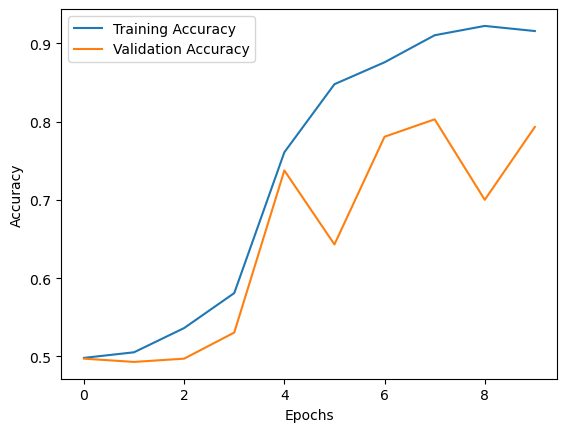

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

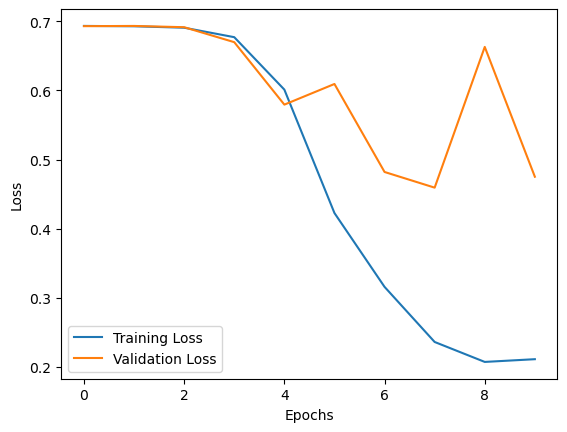

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])

## D4.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;When building the model, I selected accuracy as the evaluation metric.  Accuracy represents how often the model's predictions match the true labels of the dataset. The model demonstrated high accuracy on the training set with a score of .899.  The testing dataset was not quite as high, but achieved a score of .783.  From these results, we can conclude that the model shows moderately high predictive accuracy.

In [32]:
training_loss, training_accuracy = model.evaluate(training_padded, training_label, verbose = 0)
print("Training Loss: ", training_loss)
print("Training Accuracy: ", training_accuracy)

Training Loss:  0.24644790589809418
Training Accuracy:  0.8991666436195374


In [33]:
testing_loss, testing_accuracy = model.evaluate(test_padded, test_label, verbose = 0)
print("Testing Loss: ", testing_loss)
print("Testing Accuracy: ", testing_accuracy)

Testing Loss:  0.4827943444252014
Testing Accuracy:  0.7833333611488342


## E.

Provide the code you used to save the trained network within the neural network.

Please see the code used to save the trained network within the neural network.

In [34]:
#Save the model 
model.save('NN_model.keras')

## F.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The neural network model was trained using 2,400 samples of customer reviews and their actual sentiment recorded labels.  It uses RNN architecture with an embedding layer, several hidden layers that perform calculations, and an output layer.  These layers all function together to classify text and predict how customers feel based on their reviews.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The results of the model indicate that it correctly predicted 90.25% of training labels and 78.16% of testing labels.  These results indicate that the model performs well but still has room for improvement.  In a real-world scenario, a business could apply this model to gauge positive or negative sentiment from customer reviews.  This would help an organization understand what customer preferences are when performing digital market research.

## G.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Despite the model performing quite well overall, there are still a few improvements that can be made.  One way to improve the model is to provide additional data.  Additional reviews would expose the model to a wider vocabulary and provide a better understanding of reviewer sentiment.  Another way to potentially improve the model is to experiment with different embedding lengths.  In this analysis, embedding length was obtained by calculating the fourth root of the vocabulary size.  While this is good starting point, it might be worth fine-tuning the length to verify if there is any improvement in accuracy.  Lastly, it would also be worthwhile to add another sentiment category for neutral reviews.  This would help provide additional insight that the company may find useful.

## H.

This document has been uploaded in both Jupyter Notebook and PDF formats.  The Jupyter Notebook is titled "D213_Task2.ipynb" and the PDF file is titled "D213_Task2.pdf".

## I.

Elleh, F. (Narrator). D213 Task 2 Data Preprocessing in Python [Online video]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=8639374a-964b-4ae9-b33b-b1210052c07d

## J.

Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

What is RNN (Recurrent Neural Network)?. (n.d.). Amazon Web Services. https://aws.amazon.com/what-is/recurrent-neural-network/#:~:text=A%20recurrent%20neural%20network%20

Craig, L. (2020, August 8). CNN vs. RNN: How are they different?. TechTarget. https://www.techtarget.com/searchenterpriseai/feature/CNN-vs-RNN-How-they-differ-and-where-they-overlap#:~:text=The%20main%20differences%20between%20CNNs,such%20as%20text%20or%20videos.

Google for Developers. (n.d.). Embeddings. Google for Developers. https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture

Awan, A. A. (2023, September). What is Tokenization. DataCamp. https://www.datacamp.com/blog/what-is-tokenization

Why is it necessary to pad sequences in natural language processing models?. (2023, August 5). EUROPEAN INFORMATION TECHNOLOGIES CERTIFICATION ACADEMY. https://eitca.org/artificial-intelligence/eitc-ai-tff-tensorflow-fundamentals/natural-language-processing-with-tensorflow/training-a-model-to-recognize-sentiment-in-text/examination-review-training-a-

Patel, J. (2024, March 21). Sigmoid Function: Derivative and Working Mechanism. AnalyticsVidhya. https://www.analyticsvidhya.com/blog/2022/12/sigmoid-function-derivative-and-working-mechanism/#:~:text=Sigmoid%20function%20is%20a%20squeezing%20function%20that%20results%20from%20the,vanishing%20or%

Zvornicanin, E. (2024, March 18). What Are Embedding Layers in Neural Networks?. Baeldung. https://www.baeldung.com/cs/neural-nets-embedding-layers

Saxena, S. (2024, July 22). Binary Cross Entropy/Log Loss for Binary Classification. AnalyticsVidhya. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#:~:text=Binary%20Cross%20Entropy%20is%20used,the%20number%20of%20classes%20involved.

Agarwal, R. (2023, September 13). Complete Guide to the Adam Optimization Algorithm. BuiltIn. https://builtin.com/machine-learning/adam-optimization

Brownlee, J. (2021, January 22). How to Choose an Activation Function for Deep Learning. Machine Learning Mastery. https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

Brownlee, J. (2019, August 6). A Gentle Introduction to Early Stopping to Avoid Overtraining Neural Networks. Machine Learning Mastery. https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/